# *THIS IS MY BEST REC MODEL*

# Setting up my full dataframe

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer

import gensim, logging, warnings
import gensim.corpora as corpora
from gensim import corpora, models
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
df0 = pd.read_csv('data_files/scrape1.csv', index_col = 0)
df1 = pd.read_csv('data_files/scrape2.csv', index_col = 0)
df2 = pd.read_csv('data_files/scrape3.csv', index_col = 0)
df3 = pd.read_csv('data_files/scrape4.csv', index_col = 0)
df4 = pd.read_csv('data_files/scrape5.csv', index_col = 0)
df5 = pd.read_csv('data_files/scrape6.csv', index_col = 0)
df6 = pd.read_csv('data_files/scrape7.csv', index_col = 0)
df7 = pd.read_csv('data_files/scrape8.csv', index_col = 0)
df8 = pd.read_csv('data_files/scrape9.csv', index_col = 0)
df9 = pd.read_csv('data_files/scrape10.csv', index_col = 0)
df10 = pd.read_csv('data_files/scrape11.csv', index_col = 0)
df11 = pd.read_csv('data_files/scrape12.csv', index_col=0)
df12 = pd.read_csv('data_files/scrape13.csv', index_col=0)
df13 = pd.read_csv('data_files/scrape14.csv', index_col=0)
df14 = pd.read_csv('data_files/scrape15.csv', index_col=0)
df15 = pd.read_csv('data_files/scrape16.csv', index_col=0)
df16 = pd.read_csv('data_files/scrape17.csv', index_col=0)
df17 = pd.read_csv('data_files/scrape18.csv', index_col=0)

In [4]:
df0.iloc[7387:7390]

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
7387,4%,Rotating,4.00,NaN,Strong Rope Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,New York,Smoke Oat Brown,1,0,['4/5\xa0\xa0rDev 0%look: 4 | smell: 4 | taste...,American Brown Ale,https://www.beeradvocate.com/beer/profile/4318...
7388,7.3%,Year-round,4.28,NaN,Beerbliotek,https://cdn.beeradvocate.com/im/beers/101.jpg,Sweden,Not an udder brown ale,1,0,['4.28/5\xa0\xa0rDev 0%look: 3.75 | smell: 4.5...,American Brown Ale,https://www.beeradvocate.com/beer/profile/3191...
7389,14.3%,One-off,4.25,NaN,Triple Digit Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Ohio,Chickow! Rum Maple Barrel Aged,1,0,['4.25/5\xa0\xa0rDev 0%look: 4.25 | smell: 4.2...,American Brown Ale,https://www.beeradvocate.com/beer/profile/2855...


In [3]:
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], axis=0)

In [4]:
df = df.reset_index(drop=True)

In [5]:
df.shape

(203126, 13)

In [8]:
df.sample(10)

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
172401,4.4%,Year-round,3.53,NaN,Tirril Brewery,https://cdn.beeradvocate.com/im/placeholder-be...,England,Red Barn Ale,1,0,['3.53/5\xa0\xa0rDev 0%look: 4 | smell: 3.5 | ...,English Strong Ale,https://www.beeradvocate.com/beer/profile/3460...
60199,6.7%,Rotating,3.39,NaN,Fountainhead Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,California,Fuzzy Notion,1,0,['3.39/5\xa0\xa0rDev 0%look: 3.5 | smell: 3.25...,American IPA,https://www.beeradvocate.com/beer/profile/5352...
44000,6.2%,Rotating,3.91,NaN,Fairfield Craft Ales,https://cdn.beeradvocate.com/im/placeholder-be...,Connecticut,Little Darlin IPA,4,0,['3.93/5\xa0\xa0rDev +0.5%look: 4.25 | smell: ...,American IPA,https://www.beeradvocate.com/beer/profile/4337...
8942,5.5%,Rotating,0.00,NaN,Benelux Brewpub & Café,https://cdn.beeradvocate.com/im/placeholder-be...,Quebec,L'ouvrière,0,0,[],American Brown Ale,https://www.beeradvocate.com/beer/profile/1380...
161056,10.5%,Fall,4.00,NaN,Brasserie De Metropole,https://cdn.beeradvocate.com/im/beers/114201.jpg,Russian Federation,Last Punch,1,0,"['4/5\xa0\xa0rDev 0%Gakusei, Feb 27, 2014']",Russian Imperial Stout,https://www.beeradvocate.com/beer/profile/2330...
27216,4.4%,Year-round,3.80,NaN,Siebensternbräu,https://cdn.beeradvocate.com/im/beers/30530.jpg,Austria,7 Stern Prager Dunkles,9,3,['4.03/5\xa0\xa0rDev +6.1%look: 4.5 | smell: 4...,Munich Dunkel Lager,https://www.beeradvocate.com/beer/profile/4098...
150655,6.2%,Rotating,3.78,NaN,Lariat Lodge Brewing Company,https://cdn.beeradvocate.com/im/placeholder-be...,Colorado,Squaw Pass Stout,1,0,['3.78/5\xa0\xa0rDev 0%look: 4.25 | smell: 3.7...,American Stout,https://www.beeradvocate.com/beer/profile/4321...
19346,4.7%,Year-round,3.13,NaN,BrewPub København,https://cdn.beeradvocate.com/im/placeholder-be...,Denmark,William Wallace,2,0,['3.25/5\xa0\xa0rDev +3.8%look: 3.25 | smell: ...,Scottish Ale,https://www.beeradvocate.com/beer/profile/1209...
36516,4%,Rotating,3.74,86.0,Fourpure Brewing Co.,https://cdn.beeradvocate.com/im/beers/340255.jpg,England,Easy Peeler,16,9,['3.68/5\xa0\xa0rDev -1.6%look: 3.5 | smell: 3...,American IPA,https://www.beeradvocate.com/beer/profile/3336...
37261,6.6%,Year-round,3.72,86.0,SeaQuake Brewing,https://cdn.beeradvocate.com/im/beers/274702.jpg,California,Citra IPA,13,6,['2.82/5\xa0\xa0rDev -24.2%look: 3.5 | smell: ...,American IPA,https://www.beeradvocate.com/beer/profile/4670...


In [10]:
len(df.loc[8942, 'review'])

2

In [15]:
def get_avg_taste(string):
    """takes in the review and pulls out the rating for the taste and returns an average"""
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("taste: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None


def get_avg_look(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("look: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

def get_avg_smell(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("smell: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None


def get_avg_feel(string):
    list_list = [re.findall("\d{1}\.*\d*", item) for item in re.findall("feel: \d{1}\.*\d*", string)]
    sum_feel = 0
    tot = len(list_list)
    for list_item in list_list:
        for item in list_item:
            if item == '3..25':
                sum_feel += 3.25
            else:
                sum_feel += float(item)
    if not tot == 0:
        return sum_feel/tot
    else:
        return None

In [16]:
df['taste_avg'] = df['review'].apply(get_avg_taste)
df['look_avg'] = df['review'].apply(get_avg_look)
df['smell_avg'] = df['review'].apply(get_avg_smell)
df['feel_avg'] = df['review'].apply(get_avg_feel)

In [17]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,"6,210","2,048",['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/,3.56,3.76,3.48,3.63
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,"4,331","1,163","[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...,3.47,3.76,3.31,3.43
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,"3,101","1,225",['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...,3.65,3.64,3.59,3.61
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,"1,906",707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...,3.24,3.62,3.27,3.21
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...,3.28,3.69,3.62,3.43


In [8]:
def clean_review(review):
    """takes in a review and does the following:
    1. removes the '\xa0'
    2. removes the '\n'
    3. performs the simple preprocess from gensim"""
    review = review.replace(u'\\xa0', '')
    review = review.replace('\\n', '')
    review = gensim.utils.simple_preprocess(str(review), deacc=True)
    review = [word for word in review if word not in stop_words]
    meta_lemmed = [lemmatizer.lemmatize(word) for word in review]
#     c = " ".join(str(x) for x in meta_lemmed)
#     cleaned.append(c)
    return meta_lemmed

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
stop_words.extend(['look', 'smell', 'taste', 'feel', 'overall', 'rdev', 'beer', 'beers','nice','adams', 'jan', 'feb', 'mar',
                  'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'ml', 'oz', 'date'])

In [6]:
df['clean_review'] = df['review'].apply(clean_review)

NameError: name 'df' is not defined

In [27]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,"6,210","2,048",['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/,3.56,3.76,3.48,3.63,"[alright, one, depends, great, deep, copper, m..."
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,"4,331","1,163","[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...,3.47,3.76,3.31,3.43,"[first, sampled, visited, father, texas, earli..."
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,"3,101","1,225",['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...,3.65,3.64,3.59,3.61,"[black, color, little, light, penetration, fin..."
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,"1,906",707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...,3.24,3.62,3.27,3.21,"[bottle, abv, purchased, cold, single, poured,..."
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...,3.28,3.69,3.62,3.43,"[initial, whiff, dr, pepper, cherry, dy, flavo..."


In [28]:
 # I might need to drop short reviews - do this on the cleaned reviews.
def drop_short_reviews(review):
    if len(review) < 10:
        return None
    else:
        return review

In [29]:
df['clean_review'] = df['clean_review'].apply(drop_short_reviews)

In [30]:
df['clean_review'].isna().sum()

93618

In [31]:
df.dropna(subset=['clean_review'], inplace=True)

In [32]:
df.shape

(109508, 18)

In [33]:
def to_string(list_):
    return " ".join(list_)

In [34]:
df['key_words'] = df['clean_review'].apply(to_string)

In [35]:
df.to_csv('full_no_null.csv')

# Here I apply my basic rec to the full dataset

In [8]:
df = pd.read_csv('full_no_null.csv', index_col = 0)

In [9]:
df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,"6,210","2,048",['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/,3.56,3.76,3.48,3.63,"['alright', 'one', 'depends', 'great', 'deep',...",alright one depends great deep copper molasses...
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,"4,331","1,163","[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...,3.47,3.76,3.31,3.43,"['first', 'sampled', 'visited', 'father', 'tex...",first sampled visited father texas earlier yea...
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,"3,101","1,225",['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...,3.65,3.64,3.59,3.61,"['black', 'color', 'little', 'light', 'penetra...",black color little light penetration fingernai...
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,"1,906",707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...,3.24,3.62,3.27,3.21,"['bottle', 'abv', 'purchased', 'cold', 'single...",bottle abv purchased cold single poured fluted...
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...,3.28,3.69,3.62,3.43,"['initial', 'whiff', 'dr', 'pepper', 'cherry',...",initial whiff dr pepper cherry dy flavor give ...


In [10]:
df.describe()

,avg_score,ba_score,taste_avg,look_avg,smell_avg,feel_avg
count,109508.000000,41411.000000,108968.000000,108968.000000,108968.000000,108968.000000
mean,3.756687,85.116853,3.762992,3.827705,3.737850,3.748186
std,0.429753,5.716217,0.519760,0.439248,0.491403,0.491963
min,1.000000,42.000000,1.000000,1.000000,1.000000,1.000000
25%,3.560000,82.000000,3.500000,3.625000,3.500000,3.500000
50%,3.810000,86.000000,3.812500,3.890000,3.750000,3.778846
75%,4.020000,88.000000,4.060000,4.040000,4.000000,4.000000
max,5.000000,100.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
sm_df_full = pd.read_csv('data_files/top_beers.csv', index_col=0)

In [24]:
sm_df_full = df.loc[df['avg_score'] > 3.9]

In [133]:
# change image to none if it's a placeholder
sm_df_full.loc[sm_df_full['img'] == "https://cdn.beeradvocate.com/im/placeholder-beer.jpg", 'img'] = None

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [94]:
sm_df = pd.read_csv('data_files/sm_top_beers.csv', index_col=0)

In [16]:
sm_df_full.reset_index(inplace=True, drop=True)

In [13]:
sm_df['style'].nunique()

110

In [14]:
sm_df.drop(['abv', 'avail', 'avg_score', 'ba_score', 'brewery', 'img', 'location',
         'no_ratings', 'no_reviews', 'review', 'style', 'url',
       'taste_avg', 'look_avg', 'smell_avg', 'feel_avg', 'clean_review'], inplace=True, axis=1)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
df.drop(['abv', 'avail', 'avg_score', 'ba_score', 'brewery', 'img', 'location',
         'no_ratings', 'no_reviews', 'review', 'style', 'url',
       'taste_avg', 'look_avg', 'smell_avg', 'feel_avg', 'clean_review'], inplace=True, axis=1)

In [15]:
sm_df.set_index(['name'], inplace=True, drop=True)

In [16]:
sm_df.sample(10)

,key_words
name,
Whispers In The Dark,tap despite warmer deep dark stout quite enjoy...
Shaka Mosaic,light lemony inviting grainy note first soon s...
East Rock Lager,crystal clear medium gold color fairly aggress...
Oktoberfest,clear little head brownish amber color lightly...
Belgian Tripel,tap poured clear golden amber color small fluf...
Red Legs Scotch Ale,deep mahogany red hue thin yet creamy head she...
Neverender,picked nearly year ago seeing austin street ba...
Bavarian Almond Bros,pours orangish color semi murky finger white h...
Montessori,decervecitas teku glass playing avernum fruity...


In [17]:
stop_words.extend(['alright', 'one', 'pour', 'pours', 'gluten', 'made', 'glass', 'one', 'bit', 'maybe', 'pretty',
                  'served', 'key', 'keg', 'good', 'wonder', 'mix', 'left', 'inch', 'american', 'style', 'similar'])

In [115]:
# instantiating and generating the count matrix
count = CountVectorizer(stop_words=stop_words, max_df=0.7, min_df=4, analyzer='word')
count_matrix = count.fit_transform(sm_df['key_words'])
count_matrix.shape
# try min_df or max_df

NameError: name 'stop_words' is not defined

In [123]:
print(count_matrix.get_feature_names())

AttributeError: get_feature_names not found

In [40]:
import pickle
pickle.dump(count_matrix, open('count_matrix_tiny.p', 'wb'))

In [151]:
import pickle
pickle.dump(count_matrix, open('count_matrix_big.p', 'wb'))

In [55]:
# or we could do tfidf:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1),max_df=.7, min_df=4, stop_words=stop_words)
tfidf_matrix = tf.fit_transform(sm_df['key_words'])
tfidf_matrix.shape

(41869, 30278)

In [ ]:
%time tfidf_cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [19]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [14]:
np.save('cosine_sim.npy', cosine_sim)

In [95]:
cosine_sim = np.load('cosine_sim.npy')

In [120]:
count_matrix

<109508x177569 sparse matrix of type '<class 'numpy.int64'>'
	with 19203199 stored elements in Compressed Sparse Row format>

In [10]:
import pickle
cosine_sim = pickle.load(open('cosine_sim.p', 'rb'))

In [15]:
import h5py
cosine_sim = h5py.File("cosine_sim.hdf5", "w")

In [153]:
pickle.dump(cosine_sim, open('cosine_sim.p', 'wb'), protocol=4)

In [48]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(sm_df.index)

#  defining the function that takes in beer name 
# as input and returns the top 10 recommended beers
def recommendations(cosine_sim = cosine_sim):
    title = input('What beer do you like?')
    # initializing the empty list of recommended beers
    recommended_beers = []
    
    # gettin the index of the beer that matches the name
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching beers
    for i in top_10_indexes:
        recommended_beers.append(list(sm_df.index)[i])
        
    return recommended_beers

In [23]:
recommendations()

What beer do you like?Imperial Black IPA


['Badass Goat Black IPA',
 'Midnight Showers',
 'Blackcyl',
 'Black Rajah',
 'Eddyline Black Eddy Black IPA',
 'Chocolate Milkshake IPA',
 'Epitome',
 'In The Dark We Live',
 'Don Kiote',
 'Close Encounter']

In [53]:
recommendations()

What beer do you like?Game Over - Plum Cranberry


['Game Over - Cherry Berry',
 'Cranberry Sour',
 'Auroral',
 'Cape Codder Weisse',
 'Autre Grand Rouge',
 'Game Over - Double Plum w/ Ceylon Cinnamon',
 'Press Tart',
 'Frucht: Cranberry And Orange',
 'Dbl Underscore On The Beach',
 'Boysen Weisse']

In [97]:
# creating a Series for the beers so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(sm_df.index)

#  defining the function that takes in beer name 
# as input and returns the top 3 recommended beers
def full_recommendations(cosine_sim = cosine_sim):
    title = input('What beer do you like?')
    filter_by = input('Do you want to filter by location?')
    if filter_by == 'Yes':
        location = input('Where are you?')
    # initializing the empty list of recommended beers
    recommended_beers = []
    
    # gettin the index of the beer that matches the name
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_20_indexes = list(score_series.iloc[1:21].index)
    
    # populating the list with the titles of the best 10 matching beers
    
    
    if filter_by == 'No':
        
        for i in top_20_indexes:
            rec_beer_dict = {}
            full_ind = sm_df_full.index[sm_df_full['name'] == list(sm_df.index)[i]].tolist()[0]
            rec_beer_dict['Beer'] = list(sm_df.index)[i]
            rec_beer_dict['Brewery'] = sm_df_full.loc[full_ind]['brewery']
            rec_beer_dict['Location'] = sm_df_full.loc[full_ind]['location']
            rec_beer_dict['Rating'] = sm_df_full.loc[full_ind]['avg_score']
            rec_beer_dict['url'] = sm_df_full.loc[full_ind]['url']
            rec_beer_dict['Image'] = sm_df_full.loc[full_ind]['img']
    #         if sm_df_full.loc[full_ind]['location'] == location:
            recommended_beers.append(rec_beer_dict)
        print('--------------------')
        print('Then you should try:')    
        return recommended_beers[:3]
    
    elif filter_by == 'Yes':
        for i in top_20_indexes:
            rec_beer_dict = {}
            full_ind = sm_df_full.index[sm_df_full['name'] == list(sm_df.index)[i]].tolist()[0]
            rec_beer_dict['Beer'] = list(sm_df.index)[i]
            rec_beer_dict['Brewery'] = sm_df_full.loc[full_ind]['brewery']
            rec_beer_dict['Location'] = sm_df_full.loc[full_ind]['location']
            rec_beer_dict['Rating'] = sm_df_full.loc[full_ind]['avg_score']
            rec_beer_dict['url'] = sm_df_full.loc[full_ind]['url']
            rec_beer_dict['Image'] = sm_df_full.loc[full_ind]['img']
            if sm_df_full.loc[full_ind]['location'] == location:
                recommended_beers.append(rec_beer_dict)
    
        print('--------------------')
        print('Then you should try:')
        if len(recommended_beers) >= 1:
            return recommended_beers
        else:
            print(f"Sorry, there are no high rated beers like this in {location}")

In [107]:
test_rec = full_recommendations()

What beer do you like?The Illuminator
Do you want to filter by location?No
--------------------
Then you should try:


In [102]:
full_recommendations()

What beer do you like?no
Do you want to filter by location?no


IndexError: index 0 is out of bounds for axis 0 with size 0

In [83]:
from io import BytesIO
from PIL import Image
import requests

def load_image(url):
    if np.isnan(url) != True:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img
    else:
        print('Nope')

In [108]:
test_rec

[{'Beer': 'Ottakringer Dunkles',
  'Brewery': 'Ottakringer Brauerei AG',
  'Location': 'Austria',
  'Rating': 4.0,
  'url': None,
  'Image': None},
 {'Beer': '4 Udders',
  'Brewery': 'Ascension Brewing Company',
  'Location': 'Michigan',
  'Rating': 3.92,
  'url': None,
  'Image': None},
 {'Beer': "Barley's Alexander's Russian Imperial Stout",
  'Brewery': "Barley's Brewing Company",
  'Location': 'Ohio',
  'Rating': 4.09,
  'url': None,
  'Image': None}]

In [86]:
load_image(url)

Nope


In [101]:
def nan_to_nan(url):
    if type(url) == str:
        url = url
    else:
        url = None

In [106]:
sm_df_full['img'] = sm_df_full['img'].apply(nan_to_nan)

In [99]:
url = test_rec[0]['Image']
print(url)
print(type(url))
np.isnan(url)

https://cdn.beeradvocate.com/im/beers/31384.jpg
<class 'str'>


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [94]:
type(url) == float

True

In [89]:
sm_df_full['img'].isnull().sum()

22319

In [125]:
sm_df.sample(20)

,key_words
name,
Hop Therapy ISA,suffers fate many isas reduction malt required...
Wild Sinister Kid (Black Currants),big thanks boi dingo hooking one dark purplish...
Back on the Train,jeff thanks opportunity hazy muddy dark yellow...
Three Fates,outstanding around find much complain thing la...
Vermilion Barleywine,poured teku glass somewhat hazy copper brown c...
XOXO Coffee Stout,interesting coffee stout distinct coffee flavo...
Barrel Thieves and Hired Guns,imperial stout brewed molasses vanilla chocola...
Isoelectric Shift,benchtop brewing co isoelectric shift tap brew...
Flight Of The UFOnaut,tap ashley westland short v greenbush throwdow...


In [154]:
sm_df.to_csv('sm_top_beers.csv')

In [ ]:
Pennsylvania
Coconut Pastry Stout

In [37]:
list(sm_df.index)[1]

'La Trappe Bockbier'

In [67]:
sm_df_full.loc[53573]['location']

'Washington'

In [71]:
sm_df_full.index[sm_df_full['name'] == 'La Trappe Bockbier'].tolist()[0]

12

In [90]:
nsm_df_full.index

RangeIndex(start=0, stop=41869, step=1)

In [91]:
sm_df_full = nsm_df_full

In [66]:
str(location)

'53573    Washington\nName: location, dtype: object'

In [ ]:
sm_df_full

In [96]:
sm_df_full.loc[sm_df_full['name'] == 'Sacrament']['img']

190032    NaN
Name: img, dtype: object

In [19]:
sm_df_full.head(10)

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
0,6%,Winter,3.97,88.0,Pennsylvania Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Pennsylvania,St. Nikolaus Bock Bier,430,220,['3.9/5\xa0\xa0rDev -1.8%look: 4.25 | smell: 3...,German Bock,https://www.beeradvocate.com/beer/profile/125/...,3.989583,3.968750,3.687500,3.885417,"['dark', 'black', 'slight', 'tan', 'head', 'ro...",dark black slight tan head roasted barley good...
1,7%,Fall,4.01,89.0,Bierbrouwerij De Koningshoeven B.V.,https://cdn.beeradvocate.com/im/beers/101.jpg,Netherlands,La Trappe Bockbier,285,117,"[""4.15/5\xa0\xa0rDev +3.5%look: 4 | smell: 4 |...",German Bock,https://www.beeradvocate.com/beer/profile/184/...,4.080000,4.200000,4.020000,4.060000,"['deep', 'chestnut', 'ruby', 'slight', 'haze',...",deep chestnut ruby slight haze probably bottle...
2,6%,Winter,3.99,88.0,Millstream Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Iowa,Schokolade Bock,180,105,['3.97/5\xa0\xa0rDev -0.5%look: 4 | smell: 3.7...,German Bock,https://www.beeradvocate.com/beer/profile/107/...,4.093750,3.916667,3.916667,4.062500,"['review', 'german', 'pilsner', 'figure', 'del...",review german pilsner figure delete erroneous ...
3,6.5%,Year-round,4.01,87.0,Aass Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Norway,Aass Bock,65,40,['2.83/5\xa0\xa0rDev -29.4%look: 3 | smell: 3 ...,German Bock,https://www.beeradvocate.com/beer/profile/185/...,4.150000,3.960000,3.910000,3.970000,"['light', 'brown', 'pour', 'earthy', 'edge', '...",light brown pour earthy edge thin head white a...
4,6%,Rotating,3.91,86.0,Perrin Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Michigan,Poop Your Pants Chocolate Bock,52,11,['3.36/5\xa0\xa0rDev -14.1%look: 3.25 | smell:...,German Bock,https://www.beeradvocate.com/beer/profile/2995...,3.931818,3.909091,3.795455,3.863636,"['including', 'tax', 'six', 'pack', 'meijer', ...",including tax six pack meijer birch run mi und...
5,6.7%,Winter,4.03,87.0,Privatbrauerei Franz Inselkammer KG / Brauerei...,https://cdn.beeradvocate.com/im/beers/101.jpg,Germany,Ayinger Winterbock,40,15,['3.76/5\xa0\xa0rDev -6.7%look: 5 | smell: 3.2...,German Bock,https://www.beeradvocate.com/beer/profile/39/1...,4.083333,4.000000,3.833333,4.066667,"['pours', 'dark', 'brown', 'appears', 'almost'...",pours dark brown appears almost black huge bub...
6,7%,Winter,3.97,86.0,The Olde Mecklenburg Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,North Carolina,Yule Bock,32,17,['4.24/5\xa0\xa0rDev +6.8%look: 5 | smell: 4 |...,German Bock,https://www.beeradvocate.com/beer/profile/1924...,3.970588,4.014706,4.014706,4.029412,"['tap', 'brewery', 'literfantastic', 'clear', ...",tap brewery literfantastic clear reddish amber...
7,6.8%,Rotating,3.93,85.0,Great Dane Pub & Brewing Company (Downtown),https://cdn.beeradvocate.com/im/beers/101.jpg,Wisconsin,Velvet Hammer Bock,31,16,"[""4.67/5\xa0\xa0rDev +18.8%look: 4.5 | smell: ...",German Bock,https://www.beeradvocate.com/beer/profile/952/...,3.968750,3.906250,3.765625,3.968750,"['surprised', 'see', 'great', 'dane', 'can', '...",surprised see great dane can mix section wi ga...
8,7%,Spring,3.92,85.0,Namibia Breweries Limited,https://cdn.beeradvocate.com/im/beers/101.jpg,Namibia,Urbock,23,19,['4.7/5\xa0\xa0rDev +19.9%look: 4.25 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/1722...,3.921053,3.789474,3.815789,3.802632,"['amazing', 'love', 'enjoy', 'kraft', 'fifirst...",amazing love enjoy kraft fifirst consumption s...
9,7%,Winter,3.95,85.0,Silver City Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Washington,Wonderland Winter Lager,23,8,['4.62/5\xa0\xa0rDev +17%look: 4.75 | smell: 4...,German Bock,https://www.beeradvocate.com/beer/profile/959/...,4.187500,4.156250,4.000000,4.125000,"['one', 'finger', 'white', 'head', 'brown', 'b...",one finger white head brown body caramel toast...


In [43]:
sm_df.sample(15)

,key_words
name,
Fade Away & Radiate,hazy light golden color fruity hop balance typ...
Doppelbock By Pedro Sousa,poured teku glass body copper red cloudy head ...
Singlecut STRICTLY HAND-HELD HONEY KOLSCH,ordered draft somewhat blindly description kol...
Hefeweizen,tap brewery pawtucket ri served u tumbler pint...
Smoked Märzen (Flynn on Fire Smoked Beer Initiative),tried brewery poured clear amber white head le...
Key Lime Pie Gose,tap normal liked much picked four pack clear y...
Marks & Spencer Greenwich Winter Spiced Porter,tasting note middle like coke tan head hold we...
Charlie Don't Surf,canned crafty craft canpours like flesh pineap...
BQE - Mezcal Barrel Aged,pours pitch black nearly impervious light fing...


In [45]:
sm_df_full.loc[sm_df_full['name'] == 'Key Lime Pie Gose']

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
199762,4%,Summer,4.26,94.0,Westbrook Brewing Co.,https://cdn.beeradvocate.com/im/beers/224761.jpg,South Carolina,Key Lime Pie Gose,514,104,['3.91/5\xa0\xa0rDev -8.2%look: 3.5 | smell: 3...,Leipzig Gose,https://www.beeradvocate.com/beer/profile/2413...,4.25,4.060,4.07,4.140,"['dated', 'april', 'scrooge', 'sc', 'pours', '...",dated april scrooge sc pours slightly hazy amb...
200147,5.8%,Rotating,4.20,90.0,Southern Grist Brewing Co.,https://cdn.beeradvocate.com/im/beers/239355.jpg,Tennessee,Key Lime Pie Gose,12,2,"[""4.25/5\xa0\xa0rDev +1.2%look: 4.25 | smell: ...",Leipzig Gose,https://www.beeradvocate.com/beer/profile/4418...,4.25,4.125,4.25,4.125,"['pastry', 'pie', 'without', 'much', 'sweetnes...",pastry pie without much sweetness sound like t...
200873,5.2%,One-off,4.39,NaN,DESTIHL Brewery,https://cdn.beeradvocate.com/im/beers/415929.jpg,Illinois,Key Lime Pie Gose,3,1,"[""4.45/5\xa0\xa0rDev +1.4%look: 3.75 | smell: ...",Leipzig Gose,https://www.beeradvocate.com/beer/profile/3675...,4.75,3.750,4.25,4.000,"['tap', 'normal', 'liked', 'much', 'picked', '...",tap normal liked much picked four pack clear y...
201897,NaN,One-off,3.94,NaN,Pearl Street Brewery,NaN,Wisconsin,Key Lime Pie Gose,1,1,['3.94/5\xa0\xa0rDev 0%look: 3 | smell: 4 | ta...,Leipzig Gose,https://www.beeradvocate.com/beer/profile/682/...,4.00,3.000,4.00,4.000,"['key', 'lime', 'pie', 'pours', 'hazy', 'dark'...",key lime pie pours hazy dark orange color head...


In [135]:
sm_df_full.to_csv('top_beers.csv')

In [146]:
def fun_recommendations(cosine_sim = cosine_sim):
    title = input('What beer do you like?')
    if title == "Budweiser":
        print("You would enjoy water")
    else:
        filter_by = input('Do you want to filter by location?')
    
        if filter_by == 'Yes':
            location = input('Where are you?')
    # initializing the empty list of recommended beers
    recommended_beers = []
    
    # gettin the index of the beer that matches the name
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_20_indexes = list(score_series.iloc[1:21].index)
    
    # populating the list with the titles of the best 10 matching beers
    
    
    if filter_by == 'No':
        for i in top_20_indexes:
            rec_beer_dict = {}
            full_ind = sm_df_full.index[sm_df_full['name'] == list(sm_df.index)[i]].tolist()[0]
            rec_beer_dict['Beer'] = list(sm_df.index)[i]
            rec_beer_dict['Brewery'] = sm_df_full.loc[full_ind]['brewery']
            rec_beer_dict['Location'] = sm_df_full.loc[full_ind]['location']
            rec_beer_dict['Rating'] = sm_df_full.loc[full_ind]['avg_score']
            rec_beer_dict['url'] = sm_df_full.loc[full_ind]['url']
            rec_beer_dict['Image'] = sm_df_full.loc[full_ind]['img']
        #         if sm_df_full.loc[full_ind]['location'] == location:
            recommended_beers.append(rec_beer_dict)
        print('--------------------')
        print('Then you should try:')    
        return recommended_beers[:3]
    
    elif filter_by == 'Yes':
        for i in top_20_indexes:
            rec_beer_dict = {}
            full_ind = sm_df_full.index[sm_df_full['name'] == list(sm_df.index)[i]].tolist()[0]
            rec_beer_dict['Beer'] = list(sm_df.index)[i]
            rec_beer_dict['Brewery'] = sm_df_full.loc[full_ind]['brewery']
            rec_beer_dict['Location'] = sm_df_full.loc[full_ind]['location']
            rec_beer_dict['Rating'] = sm_df_full.loc[full_ind]['avg_score']
            rec_beer_dict['url'] = sm_df_full.loc[full_ind]['url']
            rec_beer_dict['Image'] = sm_df_full.loc[full_ind]['img']
            if sm_df_full.loc[full_ind]['location'] == location:
                recommended_beers.append(rec_beer_dict)
    
        print('--------------------')
        print('Then you should try:')    
        return recommended_beers

In [147]:
fun_recommendations()

What beer do you like?Budweiser
You would enjoy water


IndexError: index 0 is out of bounds for axis 0 with size 0

# Streamlit?

In [16]:
import streamlit as st

In [17]:
st.write("Hello World")

In [21]:
sm_df.index.nunique()

39121

In [99]:
len(sm_df)

41869

In [24]:
pd.options.display.max_rows = 999

In [27]:
sm_df_full.head(10)

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
7,6%,Winter,3.97,88.0,Pennsylvania Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Pennsylvania,St. Nikolaus Bock Bier,430,220,['3.9/5\xa0\xa0rDev -1.8%look: 4.25 | smell: 3...,German Bock,https://www.beeradvocate.com/beer/profile/125/...,3.989583,3.968750,3.687500,3.885417,"['dark', 'black', 'slight', 'tan', 'head', 'ro...",dark black slight tan head roasted barley good...
12,7%,Fall,4.01,89.0,Bierbrouwerij De Koningshoeven B.V.,https://cdn.beeradvocate.com/im/beers/101.jpg,Netherlands,La Trappe Bockbier,285,117,"[""4.15/5\xa0\xa0rDev +3.5%look: 4 | smell: 4 |...",German Bock,https://www.beeradvocate.com/beer/profile/184/...,4.080000,4.200000,4.020000,4.060000,"['deep', 'chestnut', 'ruby', 'slight', 'haze',...",deep chestnut ruby slight haze probably bottle...
17,6%,Winter,3.99,88.0,Millstream Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Iowa,Schokolade Bock,180,105,['3.97/5\xa0\xa0rDev -0.5%look: 4 | smell: 3.7...,German Bock,https://www.beeradvocate.com/beer/profile/107/...,4.093750,3.916667,3.916667,4.062500,"['review', 'german', 'pilsner', 'figure', 'del...",review german pilsner figure delete erroneous ...
41,6.5%,Year-round,4.01,87.0,Aass Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Norway,Aass Bock,65,40,['2.83/5\xa0\xa0rDev -29.4%look: 3 | smell: 3 ...,German Bock,https://www.beeradvocate.com/beer/profile/185/...,4.150000,3.960000,3.910000,3.970000,"['light', 'brown', 'pour', 'earthy', 'edge', '...",light brown pour earthy edge thin head white a...
46,6%,Rotating,3.91,86.0,Perrin Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Michigan,Poop Your Pants Chocolate Bock,52,11,['3.36/5\xa0\xa0rDev -14.1%look: 3.25 | smell:...,German Bock,https://www.beeradvocate.com/beer/profile/2995...,3.931818,3.909091,3.795455,3.863636,"['including', 'tax', 'six', 'pack', 'meijer', ...",including tax six pack meijer birch run mi und...
63,6.7%,Winter,4.03,87.0,Privatbrauerei Franz Inselkammer KG / Brauerei...,https://cdn.beeradvocate.com/im/beers/101.jpg,Germany,Ayinger Winterbock,40,15,['3.76/5\xa0\xa0rDev -6.7%look: 5 | smell: 3.2...,German Bock,https://www.beeradvocate.com/beer/profile/39/1...,4.083333,4.000000,3.833333,4.066667,"['pours', 'dark', 'brown', 'appears', 'almost'...",pours dark brown appears almost black huge bub...
70,7%,Winter,3.97,86.0,The Olde Mecklenburg Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,North Carolina,Yule Bock,32,17,['4.24/5\xa0\xa0rDev +6.8%look: 5 | smell: 4 |...,German Bock,https://www.beeradvocate.com/beer/profile/1924...,3.970588,4.014706,4.014706,4.029412,"['tap', 'brewery', 'literfantastic', 'clear', ...",tap brewery literfantastic clear reddish amber...
72,6.8%,Rotating,3.93,85.0,Great Dane Pub & Brewing Company (Downtown),https://cdn.beeradvocate.com/im/beers/101.jpg,Wisconsin,Velvet Hammer Bock,31,16,"[""4.67/5\xa0\xa0rDev +18.8%look: 4.5 | smell: ...",German Bock,https://www.beeradvocate.com/beer/profile/952/...,3.968750,3.906250,3.765625,3.968750,"['surprised', 'see', 'great', 'dane', 'can', '...",surprised see great dane can mix section wi ga...
88,7%,Spring,3.92,85.0,Namibia Breweries Limited,https://cdn.beeradvocate.com/im/beers/101.jpg,Namibia,Urbock,23,19,['4.7/5\xa0\xa0rDev +19.9%look: 4.25 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/1722...,3.921053,3.789474,3.815789,3.802632,"['amazing', 'love', 'enjoy', 'kraft', 'fifirst...",amazing love enjoy kraft fifirst consumption s...
89,7%,Winter,3.95,85.0,Silver City Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Washington,Wonderland Winter Lager,23,8,['4.62/5\xa0\xa0rDev +17%look: 4.75 | smell: 4...,German Bock,https://www.beeradvocate.com/beer/profile/959/...,4.187500,4.156250,4.000000,4.125000,"['one', 'finger', 'white', 'head', 'brown', 'b...",one finger white head brown body caramel toast...

In [36]:
sm_beer_names = sm_df_full.name.unique().tolist()

In [37]:
len(beer_names)

39121

In [41]:
pickle.dump(sm_beer_names, open('sm_beer_names.p', 'wb'))

In [52]:
test_df = pd.read_csv('data_files/sm_top_beers.csv', index_col=0)

In [53]:
test_df.head()

,key_words
name,
St. Nikolaus Bock Bier,dark black slight tan head roasted barley good...
La Trappe Bockbier,deep chestnut ruby slight haze probably bottle...
Schokolade Bock,review german pilsner figure delete erroneous ...
Aass Bock,light brown pour earthy edge thin head white a...
Poop Your Pants Chocolate Bock,including tax six pack meijer birch run mi und...


# Fixing the images for the first (wrong) scrape group

In [20]:
sm_df_full.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
0,6%,Winter,3.97,88.0,Pennsylvania Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Pennsylvania,St. Nikolaus Bock Bier,430,220,['3.9/5\xa0\xa0rDev -1.8%look: 4.25 | smell: 3...,German Bock,https://www.beeradvocate.com/beer/profile/125/...,3.989583,3.968750,3.687500,3.885417,"['dark', 'black', 'slight', 'tan', 'head', 'ro...",dark black slight tan head roasted barley good...
1,7%,Fall,4.01,89.0,Bierbrouwerij De Koningshoeven B.V.,https://cdn.beeradvocate.com/im/beers/101.jpg,Netherlands,La Trappe Bockbier,285,117,"[""4.15/5\xa0\xa0rDev +3.5%look: 4 | smell: 4 |...",German Bock,https://www.beeradvocate.com/beer/profile/184/...,4.080000,4.200000,4.020000,4.060000,"['deep', 'chestnut', 'ruby', 'slight', 'haze',...",deep chestnut ruby slight haze probably bottle...
2,6%,Winter,3.99,88.0,Millstream Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Iowa,Schokolade Bock,180,105,['3.97/5\xa0\xa0rDev -0.5%look: 4 | smell: 3.7...,German Bock,https://www.beeradvocate.com/beer/profile/107/...,4.093750,3.916667,3.916667,4.062500,"['review', 'german', 'pilsner', 'figure', 'del...",review german pilsner figure delete erroneous ...
3,6.5%,Year-round,4.01,87.0,Aass Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Norway,Aass Bock,65,40,['2.83/5\xa0\xa0rDev -29.4%look: 3 | smell: 3 ...,German Bock,https://www.beeradvocate.com/beer/profile/185/...,4.150000,3.960000,3.910000,3.970000,"['light', 'brown', 'pour', 'earthy', 'edge', '...",light brown pour earthy edge thin head white a...
4,6%,Rotating,3.91,86.0,Perrin Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Michigan,Poop Your Pants Chocolate Bock,52,11,['3.36/5\xa0\xa0rDev -14.1%look: 3.25 | smell:...,German Bock,https://www.beeradvocate.com/beer/profile/2995...,3.931818,3.909091,3.795455,3.863636,"['including', 'tax', 'six', 'pack', 'meijer', ...",including tax six pack meijer birch run mi und...


In [21]:
ndf = pd.read_csv('scrape1n.csv', index_col=0)

In [24]:
ndf.sample(15)

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url
1480,7.7%,Rotating,4.06,NaN,HammerHeart Brewing Company,NaN,Minnesota,Neandertaler,7,3,"[""4.44/5\xa0\xa0rDev +9.4%look: 4.5 | smell: 4...",German Doppelbock,https://www.beeradvocate.com/beer/profile/3132...
7114,6.5%,Rotating,4.00,NaN,Haymarket Beer Co. Pub & Brewery,NaN,Illinois,Coffee Brown Ale,1,1,"[""4/5\xa0\xa0rDev 0%look: 4 | smell: 4 | taste...",American Brown Ale,https://www.beeradvocate.com/beer/profile/2444...
2009,9.5%,Rotating,3.46,NaN,Brevard Brewing Company,NaN,North Carolina,Doppelbock,1,1,['3.46/5\xa0\xa0rDev 0%look: 4.25 | smell: 3.2...,German Doppelbock,https://www.beeradvocate.com/beer/profile/2989...
812,7.5%,Year-round,4.09,NaN,Heubacher Brauerei L. Mayer,NaN,Germany,Heller Bock,1,0,['4.09/5\xa0\xa0rDev 0%look: 3.75 | smell: 4 |...,German Bock,https://www.beeradvocate.com/beer/profile/6812...
4426,4.5%,Rotating,3.72,84.0,Surly Brewing Company,NaN,Minnesota,Witch's Tower,74,11,['4.29/5\xa0\xa0rDev +15.3%look: 4.25 | smell:...,American Brown Ale,https://www.beeradvocate.com/beer/profile/1301...
6073,NaN,Rotating,3.82,NaN,Highland Park Brewery,NaN,California,Chinatown Brown,3,0,['3.75/5\xa0\xa0rDev -1.8%look: 3.75 | smell: ...,American Brown Ale,https://www.beeradvocate.com/beer/profile/5222...
2308,7%,Winter,3.75,NaN,Brauerei Friedel Inh. Michaela Baier,https://cdn.beeradvocate.com/im/beers/156927.jpg,Germany,Friedelsator,1,1,['3.75/5\xa0\xa0rDev 0%look: 3.75 | smell: 3.7...,German Doppelbock,https://www.beeradvocate.com/beer/profile/3876...
116,7.7%,Year-round,3.47,81.0,Brouwerij De Prael,https://cdn.beeradvocate.com/im/beers/26767.jpg,Netherlands,De Prael Herfstbok,17,6,"[""3.23/5\xa0\xa0rDev -6.9%look: 4.25 | smell: ...",German Bock,https://www.beeradvocate.com/beer/profile/6331...
4113,8%,Year-round,3.88,NaN,Unertl Weissbier GmbH,NaN,Germany,Unertl Luis I. Weisser Bock,1,1,['3.88/5\xa0\xa0rDev 0%look: 3.75 | smell: 3.7...,German Weizenbock,https://www.beeradvocate.com/beer/profile/3694...
1860,9.7%,One-off,4.16,NaN,Big Dog's Draft House,NaN,Nevada,Son of a Gun,2,0,['4.3/5\xa0\xa0rDev +3.4%look: 3.75 | smell: 4...,German Doppelbock,https://www.beeradvocate.com/beer/profile/3098...


In [45]:
sm_df_full.loc[sm_df_full['img'] == 'https://cdn.beeradvocate.com/im/beers/101.jpg']

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
0,6%,Winter,3.97,88.0,Pennsylvania Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Pennsylvania,St. Nikolaus Bock Bier,430,220,['3.9/5\xa0\xa0rDev -1.8%look: 4.25 | smell: 3...,German Bock,https://www.beeradvocate.com/beer/profile/125/...,3.989583,3.968750,3.687500,3.885417,"['dark', 'black', 'slight', 'tan', 'head', 'ro...",dark black slight tan head roasted barley good...
1,7%,Fall,4.01,89.0,Bierbrouwerij De Koningshoeven B.V.,https://cdn.beeradvocate.com/im/beers/101.jpg,Netherlands,La Trappe Bockbier,285,117,"[""4.15/5\xa0\xa0rDev +3.5%look: 4 | smell: 4 |...",German Bock,https://www.beeradvocate.com/beer/profile/184/...,4.080000,4.200000,4.020000,4.060000,"['deep', 'chestnut', 'ruby', 'slight', 'haze',...",deep chestnut ruby slight haze probably bottle...
2,6%,Winter,3.99,88.0,Millstream Brewing Company,https://cdn.beeradvocate.com/im/beers/101.jpg,Iowa,Schokolade Bock,180,105,['3.97/5\xa0\xa0rDev -0.5%look: 4 | smell: 3.7...,German Bock,https://www.beeradvocate.com/beer/profile/107/...,4.093750,3.916667,3.916667,4.062500,"['review', 'german', 'pilsner', 'figure', 'del...",review german pilsner figure delete erroneous ...
3,6.5%,Year-round,4.01,87.0,Aass Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Norway,Aass Bock,65,40,['2.83/5\xa0\xa0rDev -29.4%look: 3 | smell: 3 ...,German Bock,https://www.beeradvocate.com/beer/profile/185/...,4.150000,3.960000,3.910000,3.970000,"['light', 'brown', 'pour', 'earthy', 'edge', '...",light brown pour earthy edge thin head white a...
4,6%,Rotating,3.91,86.0,Perrin Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Michigan,Poop Your Pants Chocolate Bock,52,11,['3.36/5\xa0\xa0rDev -14.1%look: 3.25 | smell:...,German Bock,https://www.beeradvocate.com/beer/profile/2995...,3.931818,3.909091,3.795455,3.863636,"['including', 'tax', 'six', 'pack', 'meijer', ...",including tax six pack meijer birch run mi und...
5,6.7%,Winter,4.03,87.0,Privatbrauerei Franz Inselkammer KG / Brauerei...,https://cdn.beeradvocate.com/im/beers/101.jpg,Germany,Ayinger Winterbock,40,15,['3.76/5\xa0\xa0rDev -6.7%look: 5 | smell: 3.2...,German Bock,https://www.beeradvocate.com/beer/profile/39/1...,4.083333,4.000000,3.833333,4.066667,"['pours', 'dark', 'brown', 'appears', 'almost'...",pours dark brown appears almost black huge bub...
6,7%,Winter,3.97,86.0,The Olde Mecklenburg Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,North Carolina,Yule Bock,32,17,['4.24/5\xa0\xa0rDev +6.8%look: 5 | smell: 4 |...,German Bock,https://www.beeradvocate.com/beer/profile/1924...,3.970588,4.014706,4.014706,4.029412,"['tap', 'brewery', 'literfantastic', 'clear', ...",tap brewery literfantastic clear reddish amber...
7,6.8%,Rotating,3.93,85.0,Great Dane Pub & Brewing Company (Downtown),https://cdn.beeradvocate.com/im/beers/101.jpg,Wisconsin,Velvet Hammer Bock,31,16,"[""4.67/5\xa0\xa0rDev +18.8%look: 4.5 | smell: ...",German Bock,https://www.beeradvocate.com/beer/profile/952/...,3.968750,3.906250,3.765625,3.968750,"['surprised', 'see', 'great', 'dane', 'can', '...",surprised see great dane can mix section wi ga...
8,7%,Spring,3.92,85.0,Namibia Breweries Limited,https://cdn.beeradvocate.com/im/beers/101.jpg,Namibia,Urbock,23,19,['4.7/5\xa0\xa0rDev +19.9%look: 4.25 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/1722...,3.921053,3.789474,3.815789,3.802632,"['amazing', 'love', 'enjoy', 'kraft', 'fifirst...",amazing love enjoy kraft fifirst consumption s...
9,7%,Winter,3.95,85.0,Silver City Brewing Co.,https://cdn.beeradvocate.com/im/beers/101.jpg,Washington,Wonderland Winter Lager,23,8,['4.62/5\xa0\xa0rDev +17%look: 4.75 | smell: 4...,German Bock,https://www.beeradvocate.com/beer/profile/959/...,4.187500,4.156250,4.000000,4.125000,"['one', 'finger', 'white', 'head', 'brown', 'b...",one finger white head brown body caramel toast...


In [44]:
for i, r in sm_df_full.iterrows():
#     name = ndf.loc[r['name'] == ndf['name']]
    r['img'] = np.where((r.img == 'https://cdn.beeradvocate.com/im/beers/101.jpg'),'wrong',r.img)
#     if name['img'] != None:
#         print(name['img'])
    #r['img'] = name['img']
    
    

In [76]:
ndf.head()

,nimg,url
0,https://cdn.beeradvocate.com/im/beers/101.jpg,https://www.beeradvocate.com/beer/profile/35/101/
1,https://cdn.beeradvocate.com/im/beers/1352.jpg,https://www.beeradvocate.com/beer/profile/143/...
2,https://cdn.beeradvocate.com/im/beers/14309.jpg,https://www.beeradvocate.com/beer/profile/35/1...
3,https://cdn.beeradvocate.com/im/beers/1252.jpg,https://www.beeradvocate.com/beer/profile/29/1...
4,https://cdn.beeradvocate.com/im/beers/68000.jpg,https://www.beeradvocate.com/beer/profile/35/6...


In [72]:
nsm_df_full = pd.merge(sm_df_full, ndf, how='left')

In [81]:
nsm_df_full.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words,nimg
0,6%,Winter,3.97,88.0,Pennsylvania Brewing Company,https://cdn.beeradvocate.com/im/beers/2272.jpg,Pennsylvania,St. Nikolaus Bock Bier,430,220,['3.9/5\xa0\xa0rDev -1.8%look: 4.25 | smell: 3...,German Bock,https://www.beeradvocate.com/beer/profile/125/...,3.989583,3.968750,3.687500,3.885417,"['dark', 'black', 'slight', 'tan', 'head', 'ro...",dark black slight tan head roasted barley good...,https://cdn.beeradvocate.com/im/beers/2272.jpg
1,7%,Fall,4.01,89.0,Bierbrouwerij De Koningshoeven B.V.,https://cdn.beeradvocate.com/im/beers/20299.jpg,Netherlands,La Trappe Bockbier,285,117,"[""4.15/5\xa0\xa0rDev +3.5%look: 4 | smell: 4 |...",German Bock,https://www.beeradvocate.com/beer/profile/184/...,4.080000,4.200000,4.020000,4.060000,"['deep', 'chestnut', 'ruby', 'slight', 'haze',...",deep chestnut ruby slight haze probably bottle...,https://cdn.beeradvocate.com/im/beers/20299.jpg
2,6%,Winter,3.99,88.0,Millstream Brewing Company,https://cdn.beeradvocate.com/im/beers/7904.jpg,Iowa,Schokolade Bock,180,105,['3.97/5\xa0\xa0rDev -0.5%look: 4 | smell: 3.7...,German Bock,https://www.beeradvocate.com/beer/profile/107/...,4.093750,3.916667,3.916667,4.062500,"['review', 'german', 'pilsner', 'figure', 'del...",review german pilsner figure delete erroneous ...,https://cdn.beeradvocate.com/im/beers/7904.jpg
3,6.5%,Year-round,4.01,87.0,Aass Brewery,https://cdn.beeradvocate.com/im/beers/664.jpg,Norway,Aass Bock,65,40,['2.83/5\xa0\xa0rDev -29.4%look: 3 | smell: 3 ...,German Bock,https://www.beeradvocate.com/beer/profile/185/...,4.150000,3.960000,3.910000,3.970000,"['light', 'brown', 'pour', 'earthy', 'edge', '...",light brown pour earthy edge thin head white a...,https://cdn.beeradvocate.com/im/beers/664.jpg
4,6%,Rotating,3.91,86.0,Perrin Brewing Co.,NaN,Michigan,Poop Your Pants Chocolate Bock,52,11,['3.36/5\xa0\xa0rDev -14.1%look: 3.25 | smell:...,German Bock,https://www.beeradvocate.com/beer/profile/2995...,3.931818,3.909091,3.795455,3.863636,"['including', 'tax', 'six', 'pack', 'meijer', ...",including tax six pack meijer birch run mi und...,NaN


In [83]:
nsm_df_full.drop(['nimg'], axis=1, inplace=True)

In [78]:
nsm_df_full.loc[nsm_df_full['img'] == 'https://cdn.beeradvocate.com/im/beers/101.jpg', 'img'] = nsm_df_full['nimg']

In [84]:
nsm_df_full.to_csv('ntop_beers.csv')

In [77]:
nsm_df_full.shape

(41869, 20)

In [47]:
ndf.rename(columns={'img' : 'nimg'}, inplace=True)

In [54]:
sm_df_full.url = sm_df_full.url.astype(str)

In [85]:
sm_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41869 entries, 0 to 41868
Data columns (total 19 columns):
abv             40064 non-null object
avail           41869 non-null object
avg_score       41869 non-null float64
ba_score        16072 non-null float64
brewery         41869 non-null object
img             19550 non-null object
location        41862 non-null object
name            41869 non-null object
no_ratings      41869 non-null object
no_reviews      41869 non-null object
review          41869 non-null object
style           41869 non-null object
url             41869 non-null object
taste_avg       41724 non-null float64
look_avg        41724 non-null float64
smell_avg       41724 non-null float64
feel_avg        41724 non-null float64
clean_review    41869 non-null object
key_words       41869 non-null object
dtypes: float64(6), object(13)
memory usage: 6.1+ MB


In [86]:
nsm_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41869 entries, 0 to 41868
Data columns (total 19 columns):
abv             40064 non-null object
avail           41869 non-null object
avg_score       41869 non-null float64
ba_score        16072 non-null float64
brewery         41869 non-null object
img             18525 non-null object
location        41862 non-null object
name            41869 non-null object
no_ratings      41869 non-null object
no_reviews      41869 non-null object
review          41869 non-null object
style           41869 non-null object
url             41869 non-null object
taste_avg       41724 non-null float64
look_avg        41724 non-null float64
smell_avg       41724 non-null float64
feel_avg        41724 non-null float64
clean_review    41869 non-null object
key_words       41869 non-null object
dtypes: float64(6), object(13)
memory usage: 7.6+ MB


In [57]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 0 to 7617
Data columns (total 13 columns):
abv           7049 non-null object
avail         7618 non-null object
avg_score     7618 non-null float64
ba_score      1406 non-null float64
brewery       7618 non-null object
nimg          1776 non-null object
location      7614 non-null object
name          7618 non-null object
no_ratings    7618 non-null object
no_reviews    7618 non-null object
review        7618 non-null object
style         7618 non-null object
url           7618 non-null object
dtypes: float64(2), object(11)
memory usage: 833.2+ KB


In [100]:
len(nsm_df_full)

41869

In [101]:
len(sm_df)

41869

In [154]:
full_df = pd.read_csv('full_no_null.csv', index_col=0)
test_df.shape

(109508, 13)

In [104]:
test_df.head()

,abv,avail,avg_score,ba_score,brewery,img,location,name,no_ratings,no_reviews,review,style,url,taste_avg,look_avg,smell_avg,feel_avg,clean_review,key_words
0,5.6%,Winter,3.60,82.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Winter Lager,"6,210","2,048",['3.31/5\xa0\xa0rDev -8.1%look: 4 | smell: 3.5...,German Bock,https://www.beeradvocate.com/beer/profile/35/101/,3.56,3.76,3.48,3.63,"['alright', 'one', 'depends', 'great', 'deep',...",alright one depends great deep copper molasses...
1,4.4%,Year-round,3.19,73.0,Spoetzl Brewery,https://cdn.beeradvocate.com/im/beers/101.jpg,Texas,Shiner Bock,"4,331","1,163","[""3.19/5\xa0\xa0rDev 0%look: 3.75 | smell: 2.7...",German Bock,https://www.beeradvocate.com/beer/profile/143/...,3.47,3.76,3.31,3.43,"['first', 'sampled', 'visited', 'father', 'tex...",first sampled visited father texas earlier yea...
2,5.8%,Rotating,3.66,83.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Chocolate Bock,"3,101","1,225",['3.78/5\xa0\xa0rDev +3.3%look: 3.75 | smell: ...,German Bock,https://www.beeradvocate.com/beer/profile/35/1...,3.65,3.64,3.59,3.61,"['black', 'color', 'little', 'light', 'penetra...",black color little light penetration fingernai...
3,5.2%,Year-round,2.89,68.0,Anheuser-Busch,https://cdn.beeradvocate.com/im/beers/101.jpg,Missouri,Michelob AmberBock,"1,906",707,"[""3.09/5\xa0\xa0rDev +6.9%look: 3.5 | smell: 2...",German Bock,https://www.beeradvocate.com/beer/profile/29/1...,3.24,3.62,3.27,3.21,"['bottle', 'abv', 'purchased', 'cold', 'single...",bottle abv purchased cold single poured fluted...
4,5.8%,Rotating,3.50,80.0,Boston Beer Company (Samuel Adams),https://cdn.beeradvocate.com/im/beers/101.jpg,Massachusetts,Samuel Adams Cherry Chocolate Bock,873,187,['3/5\xa0\xa0rDev -14.3%look: 3 | smell: 3 | t...,German Bock,https://www.beeradvocate.com/beer/profile/35/6...,3.28,3.69,3.62,3.43,"['initial', 'whiff', 'dr', 'pepper', 'cherry',...",initial whiff dr pepper cherry dy flavor give ...


In [105]:
test_df.columns

Index(['abv', 'avail', 'avg_score', 'ba_score', 'brewery', 'img', 'location',
       'name', 'no_ratings', 'no_reviews', 'review', 'style', 'url',
       'taste_avg', 'look_avg', 'smell_avg', 'feel_avg', 'clean_review',
       'key_words'],
      dtype='object')

In [110]:
test_df.drop(['brewery', 'img', 
       'name', 'review', 'url',
       'clean_review',
       'key_words'], axis=1, inplace=True)

In [117]:
test_df.head()

,abv,avail,avg_score,ba_score,location,no_ratings,no_reviews,style,taste_avg,look_avg,smell_avg,feel_avg
0,5.6%,Winter,3.60,82.0,Massachusetts,6210,2048,German Bock,3.56,3.76,3.48,3.63
1,4.4%,Year-round,3.19,73.0,Texas,4331,1163,German Bock,3.47,3.76,3.31,3.43
2,5.8%,Rotating,3.66,83.0,Massachusetts,3101,1225,German Bock,3.65,3.64,3.59,3.61
3,5.2%,Year-round,2.89,68.0,Missouri,1906,707,German Bock,3.24,3.62,3.27,3.21
4,5.8%,Rotating,3.50,80.0,Massachusetts,873,187,German Bock,3.28,3.69,3.62,3.43


In [118]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [119]:
test_df['country'] = test_df['location'].map(lambda x: 'US' if x in states else x)

In [122]:
test_df.sample(15)

,abv,avail,avg_score,ba_score,location,no_ratings,no_reviews,style,taste_avg,look_avg,smell_avg,feel_avg,country
179852,5.5%,Rotating,4.12,NaN,Florida,5,1,Berliner Weisse,4.250000,3.500000,4.000000,4.250000,US
132185,5%,Rotating,3.69,84.0,Ohio,109,56,Pumpkin Beer,3.630000,3.640000,3.760000,3.670000,US
35014,7.3%,Rotating,3.84,86.0,Massachusetts,28,8,American IPA,4.031250,4.218750,3.781250,4.156250,US
132159,8.8%,Fall,4.04,89.0,Pennsylvania,172,38,Pumpkin Beer,3.950000,4.070000,3.940000,3.920000,US
104549,NaN,Rotating,3.62,NaN,Virginia,1,1,German Kölsch,3.500000,4.000000,3.750000,3.750000,US
175791,7.2%,Rotating,3.96,NaN,New Hampshire,3,1,American Pale Wheat Ale,4.000000,3.750000,3.750000,4.000000,US
21427,5.8%,Spring,3.67,82.0,Illinois,120,37,American Amber / Red Lager,3.680000,3.840000,3.600000,3.660000,US
88856,6%,Rotating,3.97,NaN,Washington,5,2,American Pale Ale (APA),4.000000,4.000000,4.000000,4.250000,US
50746,6.5%,One-off,4.28,NaN,New York,2,1,American IPA,4.500000,4.500000,4.250000,4.000000,US
47081,7.1%,Rotating,3.93,NaN,California,3,2,American IPA,3.750000,4.000000,4.000000,4.000000,US


In [124]:
test_df.to_csv('data_files/stats_df.csv')

(array([7.3000e+01, 3.8000e+01, 1.0800e+02, 5.4000e+01, 1.9000e+01,
        4.3900e+02, 2.9700e+02, 8.4000e+02, 9.7700e+02, 6.0300e+02,
        4.4080e+03, 5.4340e+03, 1.2518e+04, 2.1148e+04, 1.3379e+04,
        3.0342e+04, 1.1554e+04, 4.7320e+03, 1.1010e+03, 9.0400e+02]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

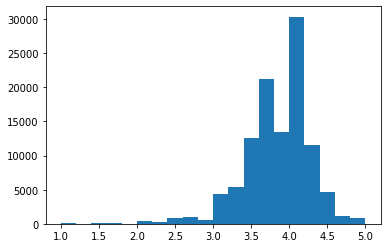

In [132]:
plt.hist(test_df['look_avg'].dropna(), bins=20)

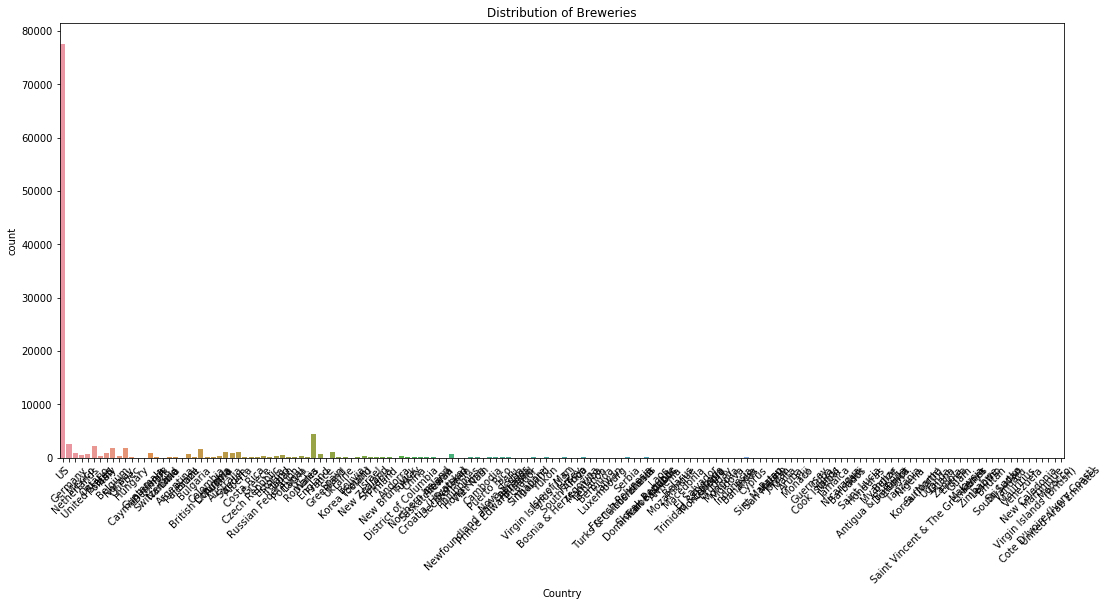

In [135]:
f, ax = plt.subplots(figsize=(18,8))
ax = sns.countplot(x='country', data=test_df)
ax.set_title("Distribution of Breweries")
plt.xticks(rotation=45)
ax.set_xlabel("Country");

In [136]:
test_df.shape

(109508, 13)

In [144]:
import plotly.express as px
import plotly.graph_objects as go
# fig = px.bar(test_df, x='style', y='no_reviews', barmode='group')
# fig = go.Figure([go.Bar(x=test_df['style'], y=test_df['no_reviews'])])
# fig.show()

In [157]:
test_df.describe()

,avg_score,ba_score,no_ratings,no_reviews,taste_avg,look_avg,smell_avg,feel_avg
count,109508.000000,41411.000000,109508.000000,109508.000000,108968.000000,108968.000000,108968.000000,108968.000000
mean,3.756687,85.116853,64.102047,19.301293,3.762992,3.827705,3.737850,3.748186
std,0.429753,5.716217,373.642056,108.779816,0.519760,0.439248,0.491403,0.491963
min,1.000000,42.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.560000,82.000000,2.000000,1.000000,3.500000,3.625000,3.500000,3.500000
50%,3.810000,86.000000,6.000000,2.000000,3.812500,3.890000,3.750000,3.778846
75%,4.020000,88.000000,19.000000,6.000000,4.060000,4.040000,4.000000,4.000000
max,5.000000,100.000000,17498.000000,4017.000000,5.000000,5.000000,5.000000,5.000000


In [158]:
test_df.no_ratings.sum()

7019687

In [149]:
test_df.country.value_counts()

US                                77616
England                            4458
Germany                            2652
Ontario                            2235
Belgium                            1881
Quebec                             1734
British Columbia                   1578
Australia                          1141
Spain                              1015
Alberta                            1009
Sweden                              923
Italy                               877
Netherlands                         850
Denmark                             814
France                              759
United States                       729
Scotland                            726
Brazil                              600
Japan                               551
Mexico                              457
Poland                              407
Russian Federation                  365
Ireland                             363
New Zealand                         348
Austria                             295


In [150]:
labels = ['US', 'Canada', 'England', 'Germany', 'Belgium', 'Australia', 'Spain', 'RestOfWorld']
values = [77616, (2235+1734+1578), 4458, 2652, 1881, 1141, 1015, (109508 - (77616+2235+1734+1578+4458+2652+1881+1141+1015))]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

In [151]:
fig.show()

In [170]:
data_reviews = px.data.

In [207]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=test_df.loc[test_df['style'] == 'American Stout']['avg_score'], name='American Stout'))
fig.add_trace(go.Histogram(x=test_df.loc[test_df['style'] == 'New England IPA']['avg_score'], name='American IPA'))
fig.add_trace(go.Histogram(x=test_df.loc[test_df['style'] == 'American Light Lager']['avg_score'],name='American Cream Ale'))

# Overlay both histograms
fig.update_layout(title='Distribution of User Ratings', barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.7)
fig.show()

In [205]:
full_df.groupby(by='style')['avg_score'].mean().sort_values(ascending=False)

style
New England IPA                 4.255997
American Imperial Porter        4.196800
American Imperial IPA           4.168800
American Imperial Stout         4.135673
Belgian Lambic                  4.103662
Belgian Quadrupel (Quad)        4.081300
Belgian Gueuze                  4.079400
Russian Imperial Stout          4.034565
American Wild Ale               4.025476
Belgian Fruit Lambic            3.989333
Baltic Porter                   3.975100
Belgian Saison                  3.974000
German Eisbock                  3.963529
Flanders Red Ale                3.958256
British Barleywine              3.956151
American Brett                  3.949948
American Wheatwine Ale          3.945435
American Barleywine             3.939666
English Sweet / Milk Stout      3.936887
Berliner Weisse                 3.918799
American Imperial Red Ale       3.913959
Leipzig Gose                    3.902497
English Old Ale                 3.898392
American Strong Ale             3.897201
Flanders O